
# Predict Income using US Census Data

**Data Set Information**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. The prediction task is to determine whether a person makes over $50K a year.

**Relevant papers**

Ron Kohavi, ["Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid"][1], *Proceedings of the Second International Conference on Knowledge Discovery and Data Mining*, 1996. (PDF)

  [1]: http://robotics.stanford.edu/~ronnyk/nbtree.pdf

**Attribute Information**


>50K, <=50K. 

1. age: continuous. 

1. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

1. fnlwgt: continuous. 

1. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 
12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

1. education-num: continuous. 

1. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

1. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

1. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

1. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

1. sex: Female, Male. 

1. capital-gain: income from investment sources, apart from wages/salary.. 

1. capital-loss: losses from investment sources, apart from wages/salary. 

1. hours-per-week: continuous. 

1. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



###### Load Libraries

In [15]:
library(tidyverse)
library(plotly)
library(DataExplorer)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(xgboost)
library(e1071)
library(parallelSVM)
library(Metrics)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.4.2     v purrr   0.2.4
v tidyr   0.8.0     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.3.0
v tibble  1.4.2     v forcats 0.3.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::combine()       masks randomForest::combine(), gridExtra::combine()
x dplyr::filter()        masks plotly::filter(), stats::filter()
x dplyr::lag() 

##### **Load & explore the features of the dataset**

In [27]:
setcol <- c("age","workclass","fnlwgt","education","education-num","marital-status",
            "occupation","relationship","race","sex","capital-gain","capital-loss",
            "hours-per-week","native-country","target")
#load data
adult <- read.table("~/Desktop/Predict-Income-using-US-Census-Data/adult.data.txt",header = F,
                    sep = ",",col.names = setcol,na.strings = c(" ?"),stringsAsFactors = T)
head(adult)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [28]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels " Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  4

Remove meaningless features

In [5]:
adult <- dplyr::select(adult, -fnlwgt, -education.num,
                         -capital.gain, -capital.loss)

In [11]:
dim(adult)

[1] 32561    11

In [8]:
head(adult)

age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,target
39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [9]:
summary(adult)


      age         workclass          education         marital.status    
 Min.   :17.00   Length:32561       Length:32561       Length:32561      
 1st Qu.:28.00   Class :character   Class :character   Class :character  
 Median :37.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :38.58                                                           
 3rd Qu.:48.00                                                           
 Max.   :90.00                                                           
  occupation        relationship           race               sex           
 Length:32561       Length:32561       Length:32561       Length:32561      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [10]:
colSums(sapply(adult,is.na))

age      workclass      education marital.status     occupation 
             0           1836              0              0           1843 
  relationship           race            sex hours.per.week native.country 
             0              0              0              0            583 
        target 
             0

In [7]:
sum(!complete.cases(adult))

[1] 2399

In [8]:
# % of Missing Values
sum(is.na(adult)) / (nrow(adult) *ncol(adult))


[1] 0.008726186

In [14]:
adult_omitted =  adult %>% na.omit()
colSums(sapply(adult_omitted,is.na))


age      workclass      education marital.status     occupation 
             0              0              0              0              0 
  relationship           race            sex hours.per.week native.country 
             0              0              0              0              0 
        target 
             0

In [11]:
tmp_df <- adult[!duplicated(adult), ]
dim(tmp_df)

[1] 32537    15

In [36]:
df <- adult_omitted
df$target<- ifelse (df$target=='>50K',1,0)
library(caTools)
set.seed(1000)
#The data is split so that 70% is put into the training set and 30% into the trest set
spl<-sample.split(df$target, SplitRatio=0.7)
train<-subset(df,spl== TRUE)
test <-subset(df, spl== FALSE)
head(df)

age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,target
39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0


In [37]:
censusglm<-glm(target ~ ., data=train, family=binomial)

Warning message:
"glm.fit: algorithm did not converge"

In [39]:
summary(censusglm)


Call:
glm(formula = target ~ ., family = binomial, data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                               -2.657e+01  1.168e+05       0
age                                        6.099e-20  2.414e+02       0
workclass Local-gov                        2.777e-18  1.708e+04       0
workclass Private                          1.536e-18  1.443e+04       0
workclass Self-emp-inc                     1.948e-18  1.948e+04       0
workclass Self-emp-not-inc                 2.199e-18  1.674e+04       0
workclass State-gov                        2.717e-17  1.865e+04       0
workclass Without-pay                      2.872e-18  1.201e+05       0
education 11th                             6.785e-19  2.009e+04       0
education 12th                            -4.557e-19  2

In [40]:
table(test$target)



   0 
9049 

In [41]:
predict_LR<-predict(censusglm, newdata=test, type="response")
confusionmatrix_LR<- table(test$target, predict_LR > 0.5)
confusionmatrix_LR


   
    FALSE
  0  9049

In [49]:
treeFit<- rpart(target~.,data=train,method = 'class')
print(treeFit)

ERROR: Error in cbind(yval2, yprob, nodeprob): number of rows of matrices must match (see arg 2)


In [46]:
accuracy_LR <-(confusionmatrix_LR[1,1] + confusionmatrix_LR[2,2])/sum(confusionmatrix_LR)
accuracy_LR

ERROR: Error in `[.default`(confusionmatrix_LR, 2, 2): subscript out of bounds


## EDA & Visualization

In [16]:
plot_str(adult)

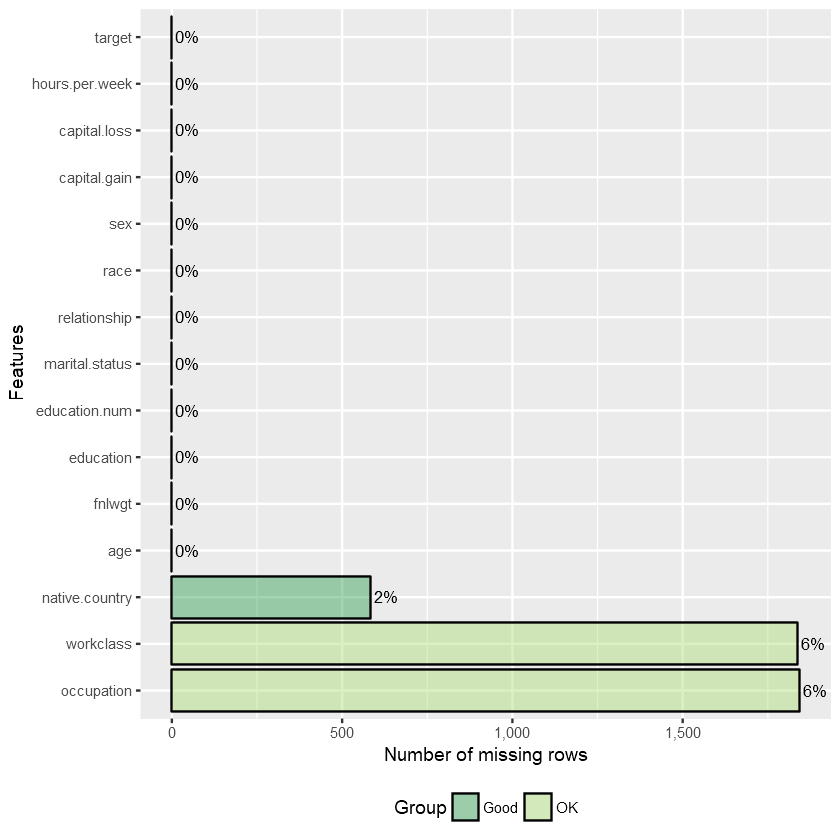

In [12]:
plot_missing(adult)

**Correlation Map between attributes**

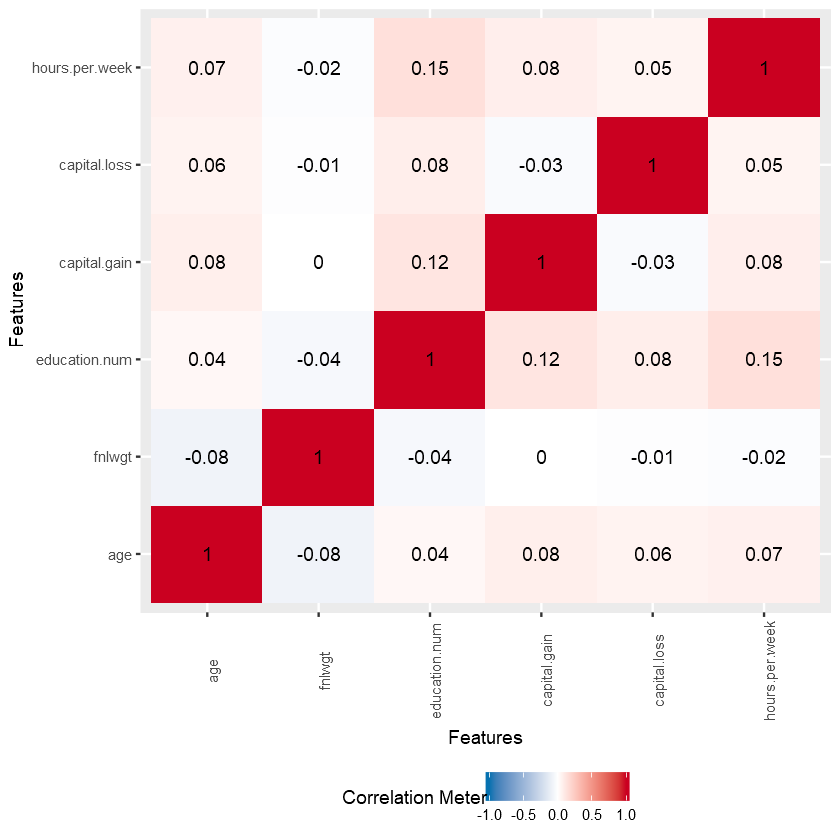

In [13]:
plot_correlation(adult, type = 'continuous','Review.Date')

In [17]:
#plot_histogram(adult)
pairs(adult)

ERROR: Error in pairs.default(adult): non-numeric argument to 'pairs'


In [62]:
#plot_bar(adult)

In [63]:
#plot_density(adult)

### *Continuous Features*

#### **Age** 

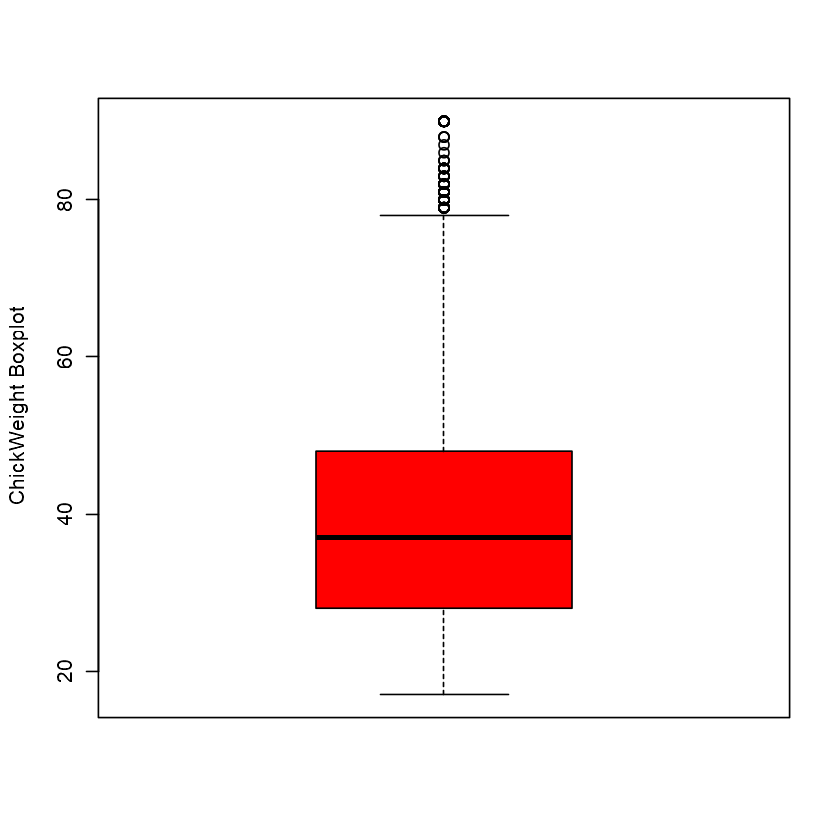

In [7]:
boxplot(adult$age, col = rainbow(6), ylab = "ChickWeight Boxplot")

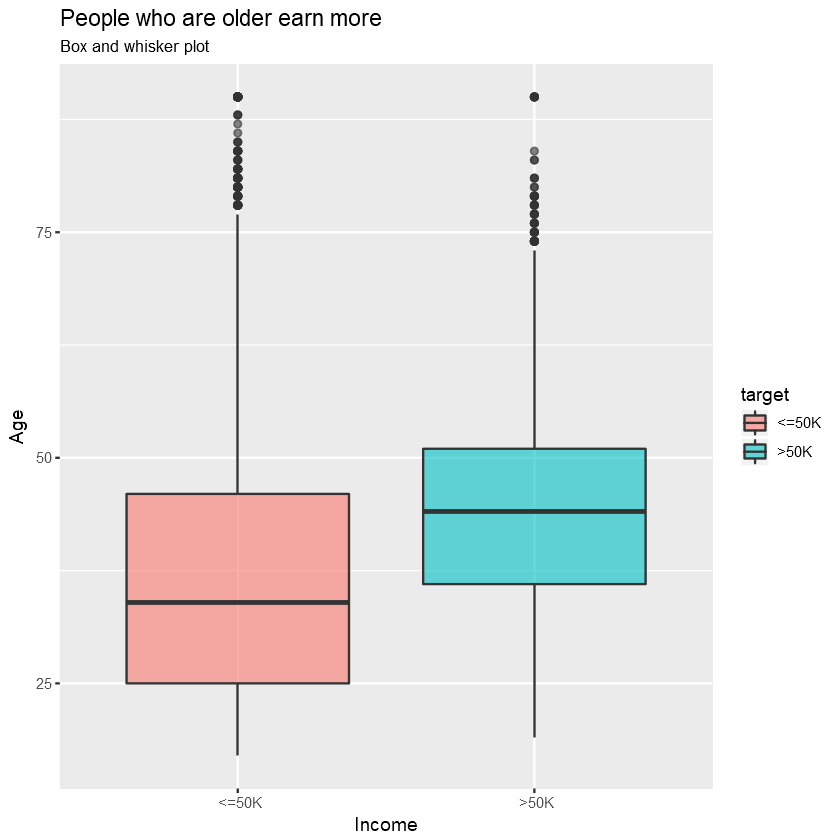

In [9]:
age_box <- ggplot(adult, aes(x = target, y = age, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Age", title = "People who are older earn more",
        subtitle = "Box and whisker plot")

age_box

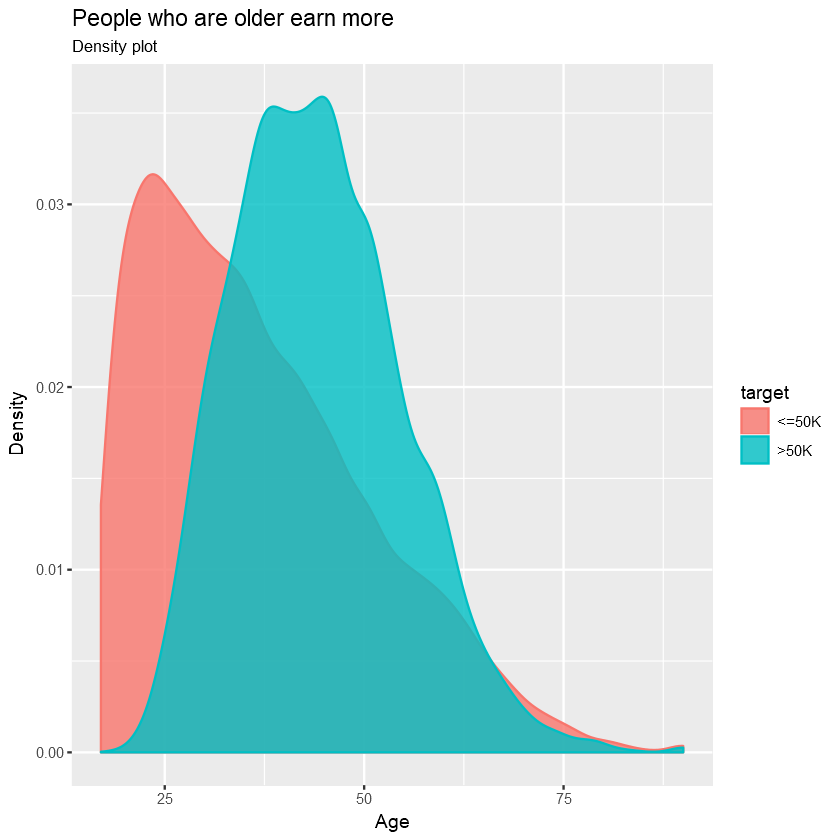

In [53]:
age_density <- ggplot(adult, aes(x = age, color = target, fill = target)) + geom_density(alpha = 0.8) +
   labs(x = "Age", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
age_density

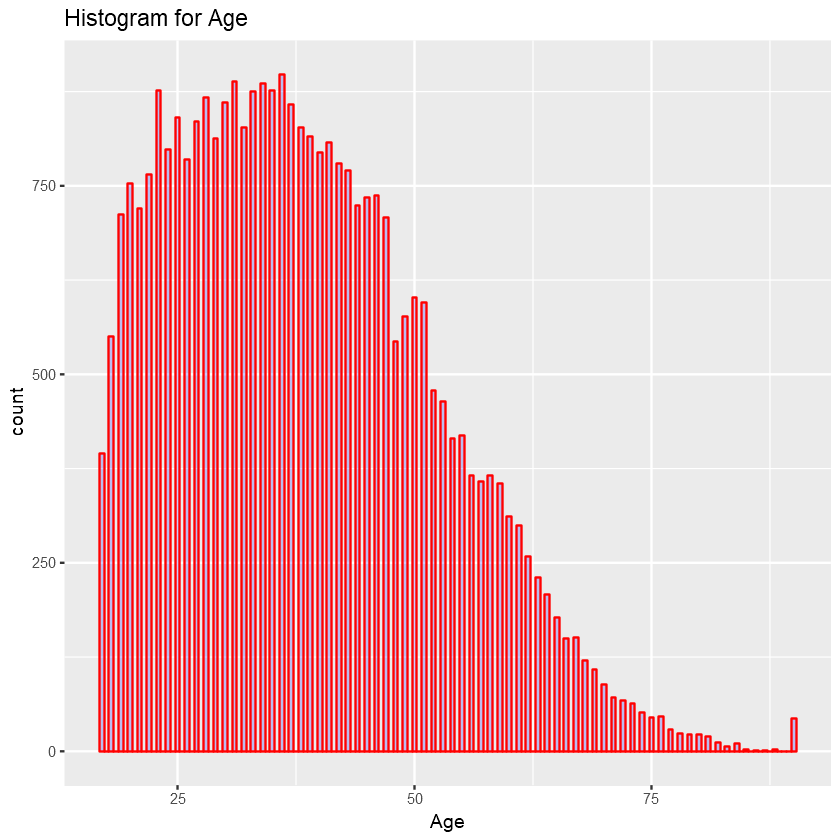

In [40]:
qplot(adult$age,
      geom="histogram",
      binwidth = 0.5,  
      main = "Histogram for Age", 
      xlab = "Age",  
      fill=I("blue"), 
      col=I("red"), 
      alpha=I(.2))


#### **Hours per.Week**

In [1]:


qplot(adult$hours.per.week,
      geom="histogram",  
      main = "Histogram for Hours Per Week", 
      xlab = "Hrs Per Week",  
      fill=I("blue"), 
      col=I("red"))

ERROR: Error in qplot(adult$hours.per.week, geom = "histogram", main = "Histogram for Hours Per Week", : could not find function "qplot"


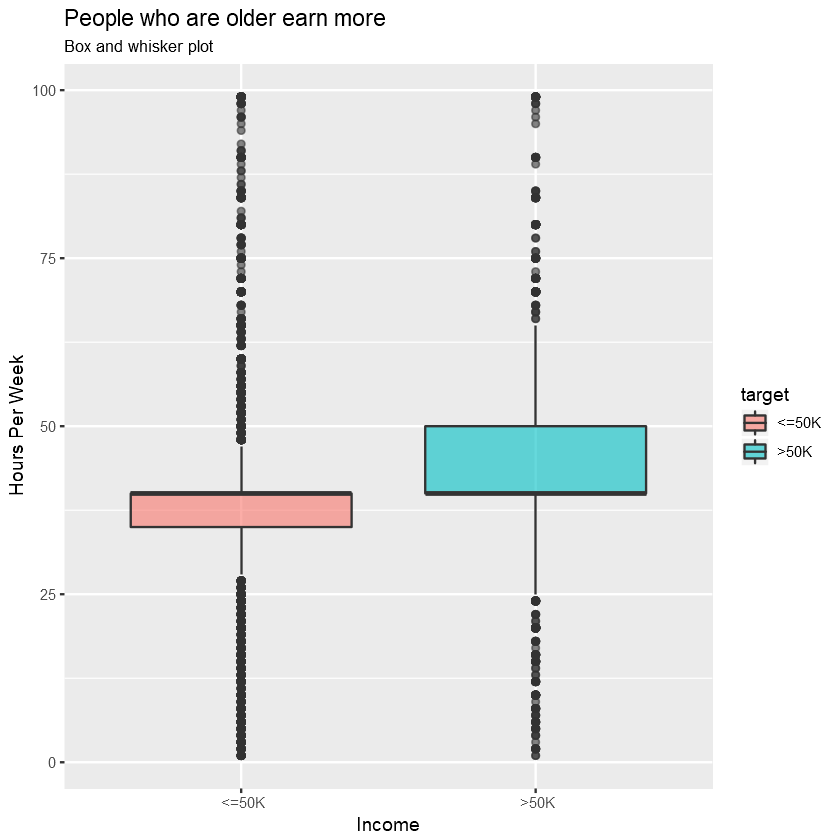

In [90]:
hours.per.week_box <- ggplot(adult, aes(x = target, y = hours.per.week, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Hours Per Week", title = "People who are older earn more",
        subtitle = "Box and whisker plot")
hours.per.week_box

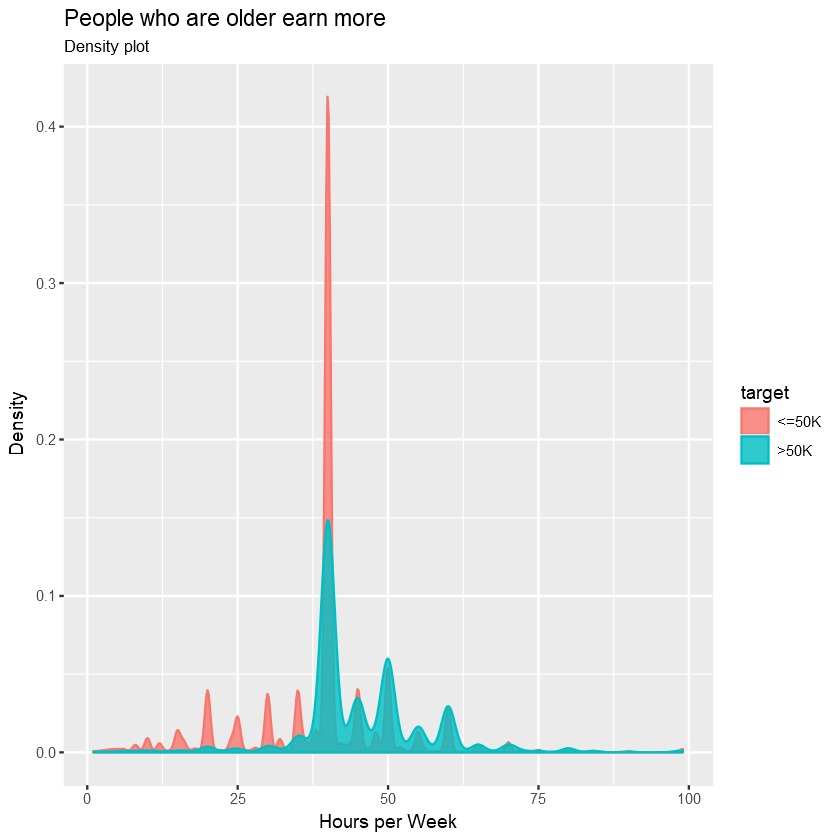

In [92]:
hours_per_week_density <- ggplot(adult, aes(x = hours.per.week, color = target, fill = target)) + 
geom_density(alpha = 0.8) +
   labs(x = "Hours per Week", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
hours_per_week_density

#### **Education Num**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


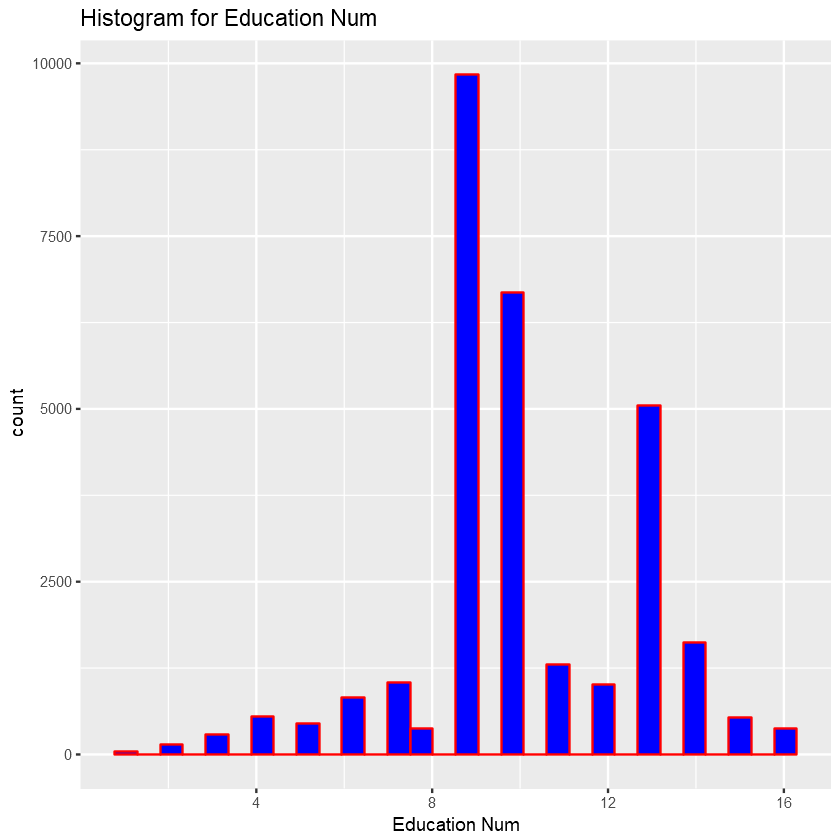

In [26]:
qplot(adult$education.num,
      geom="histogram",  
      main = "Histogram for Education Num", 
      xlab = "Education Num",  
      fill=I("blue"), 
      col=I("red"))

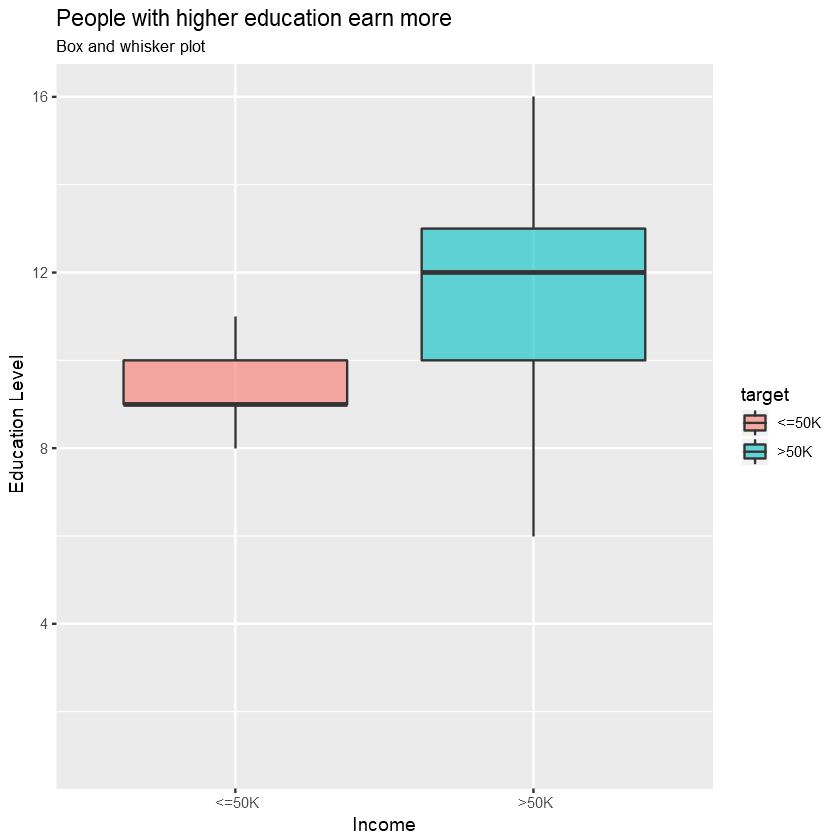

In [66]:
education_num_box <- ggplot(adult, aes(x = target, y = education.num, fill = target)) +
   geom_boxplot(alpha = 0.6,outlier.shape = NA) +
   labs(x = "Income", y = "Education Level", title = "People with higher education earn more",
        subtitle = "Box and whisker plot")
education_num_box

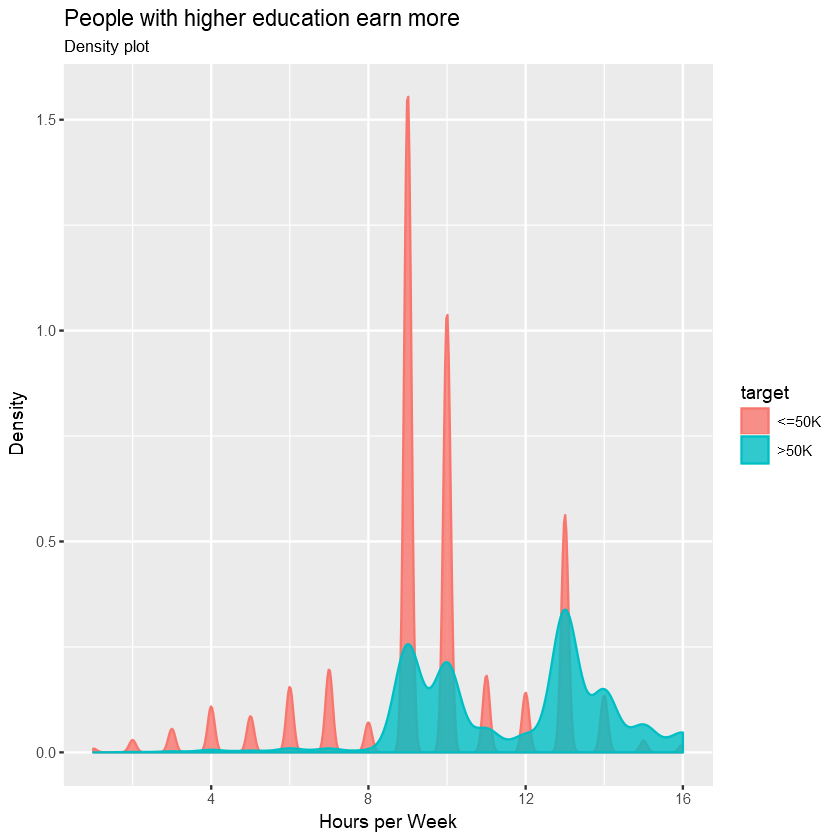

In [64]:
education_num_density <- ggplot(adult, aes(x = education.num, color = target, fill = target)) + 
geom_density(alpha = 0.8) +
   labs(x = "Hours per Week", y = "Density", title = "People with higher education earn more",
        subtitle = "Density plot")
education_num_density

### *Categorical Features*

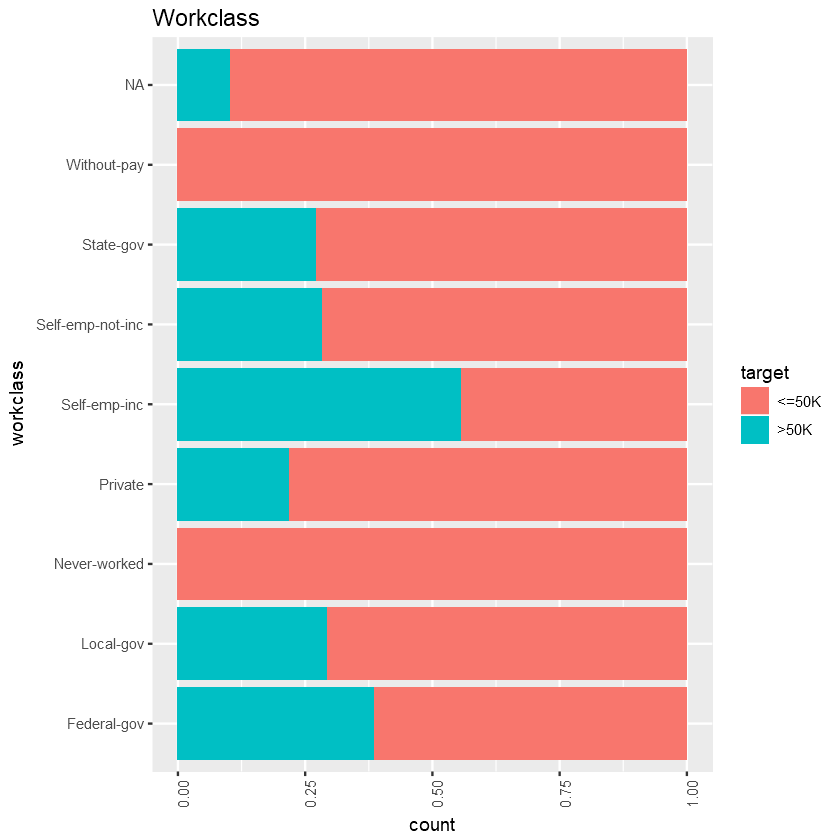

In [21]:
#workclass
workclass_bar <- ggplot(adult, aes(x = workclass, fill = target)) + geom_bar(position="fill") + 
coord_flip() + theme(axis.text.x = element_text(angle = 90)) + ggtitle("Workclass")

workclass_bar

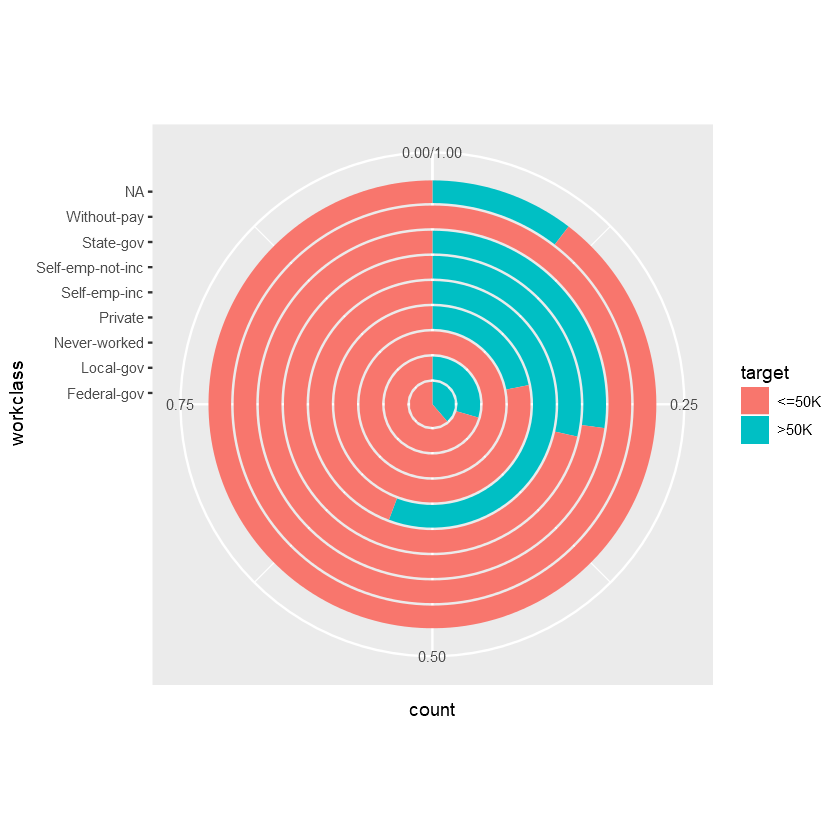

In [54]:
pie <- workclass_bar + coord_polar(theta = "y")
pie


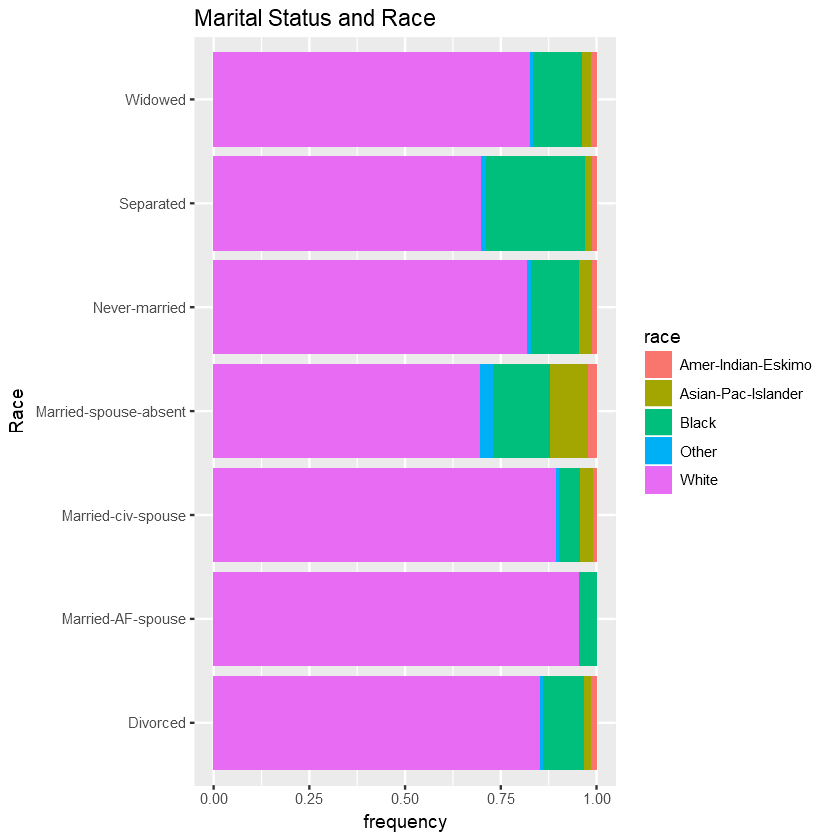

In [15]:
ggplot(adult, aes(marital.status, fill = race) ) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Marital Status and Race')+
  xlab('Race') +
  ylab('frequency')


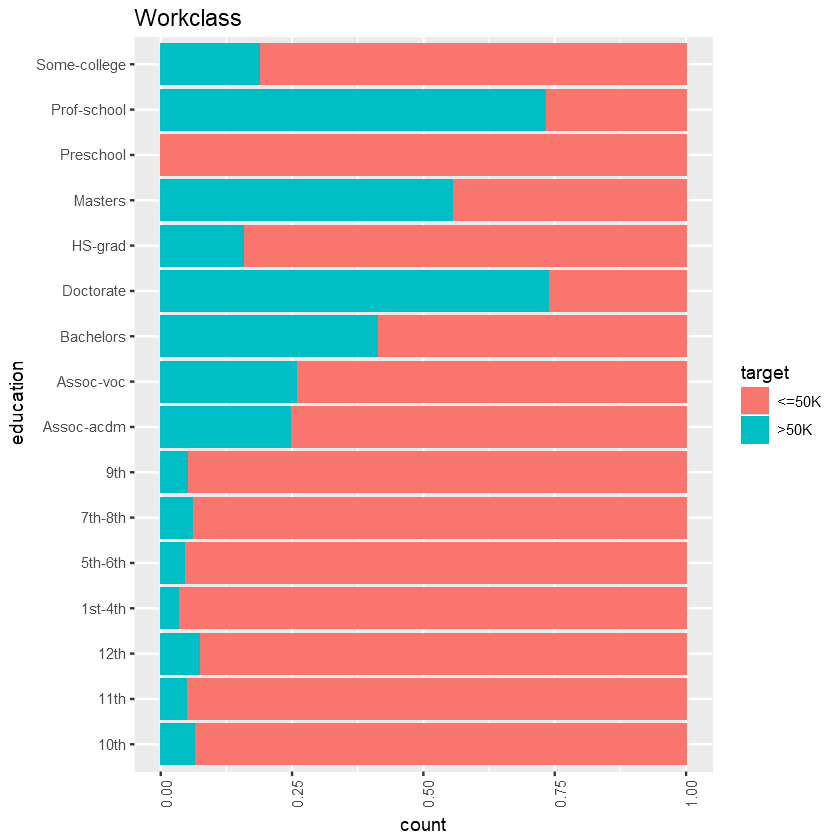

In [11]:
#Education
ggplot(adult, aes(x = education, fill = target)) + geom_bar(position="fill") +
 coord_flip() + theme(axis.text.x = element_text(angle = 90)) + ggtitle("Workclass")


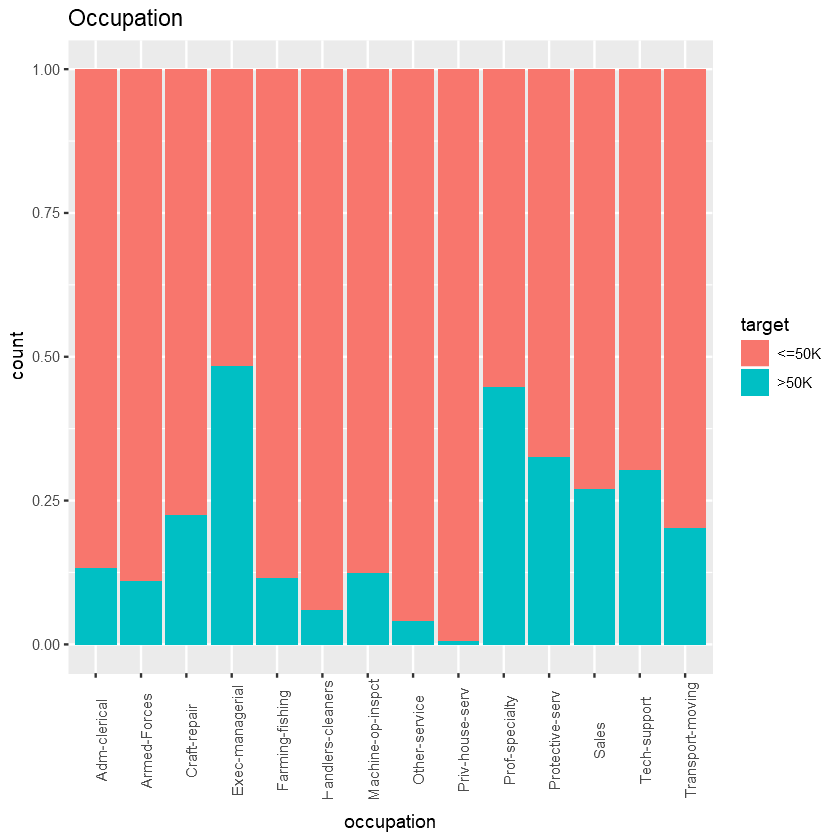

In [31]:
#occupation
ggplot(adult, aes(x = occupation, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Occupation")

The most occupation is Exec-Mangerial and Prof-Specilty and the least is Handler-Clearners


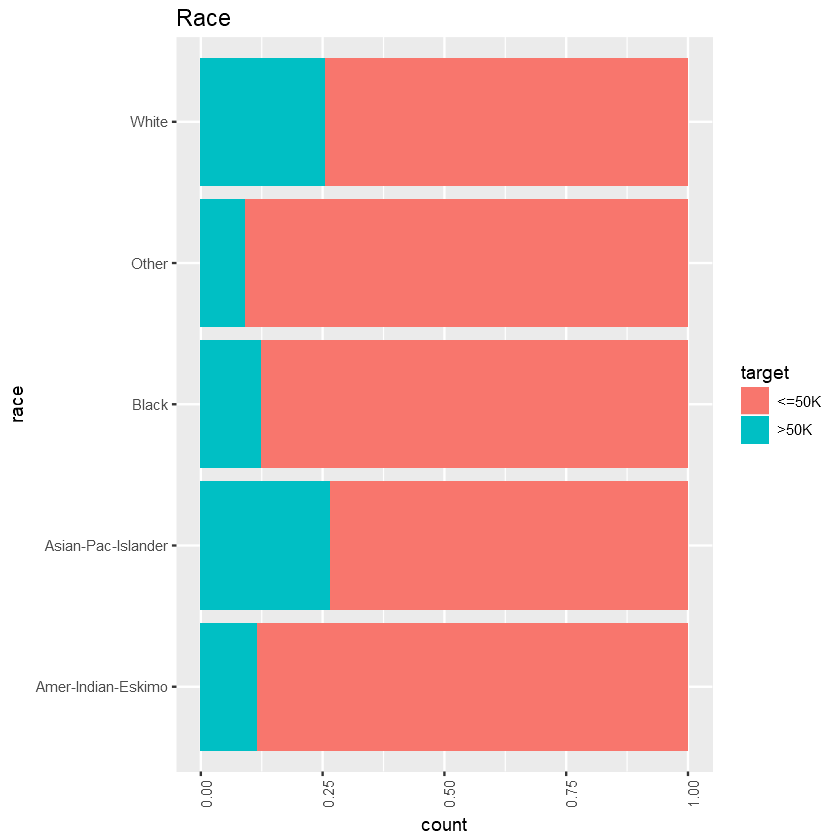

In [28]:
#race
ggplot(adult, aes(x = race, fill = target)) + geom_bar(position="fill") + coord_flip() +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Race")

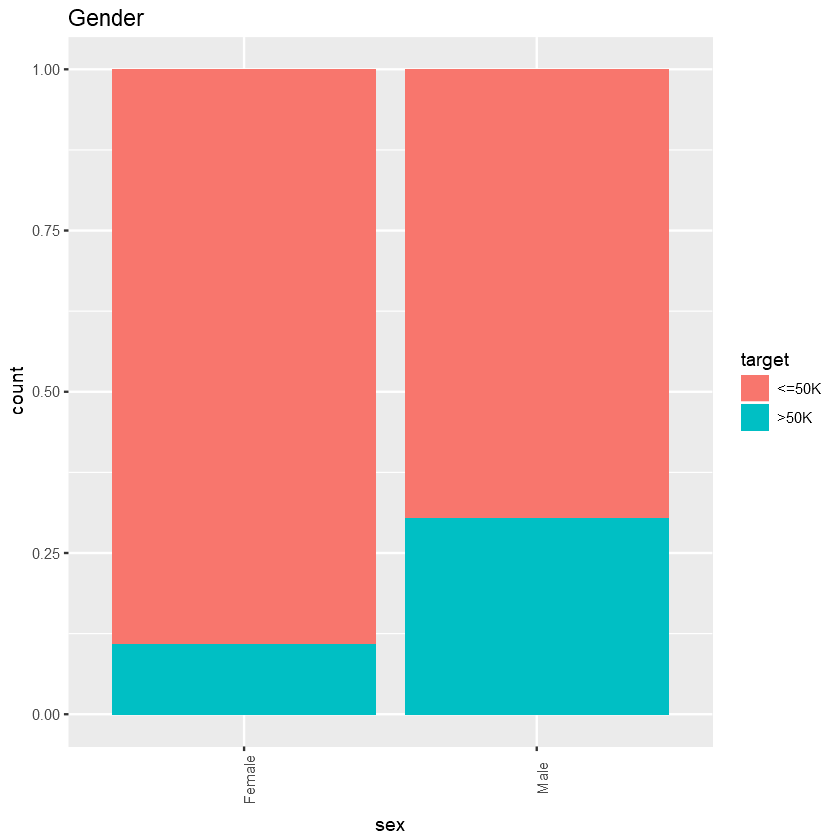

In [59]:
#sex
ggplot(adult, aes(x = sex, fill = target)) + 
geom_bar(position="fill") + theme(axis.text.x = element_text(angle = 90)) + ggtitle("Gender")

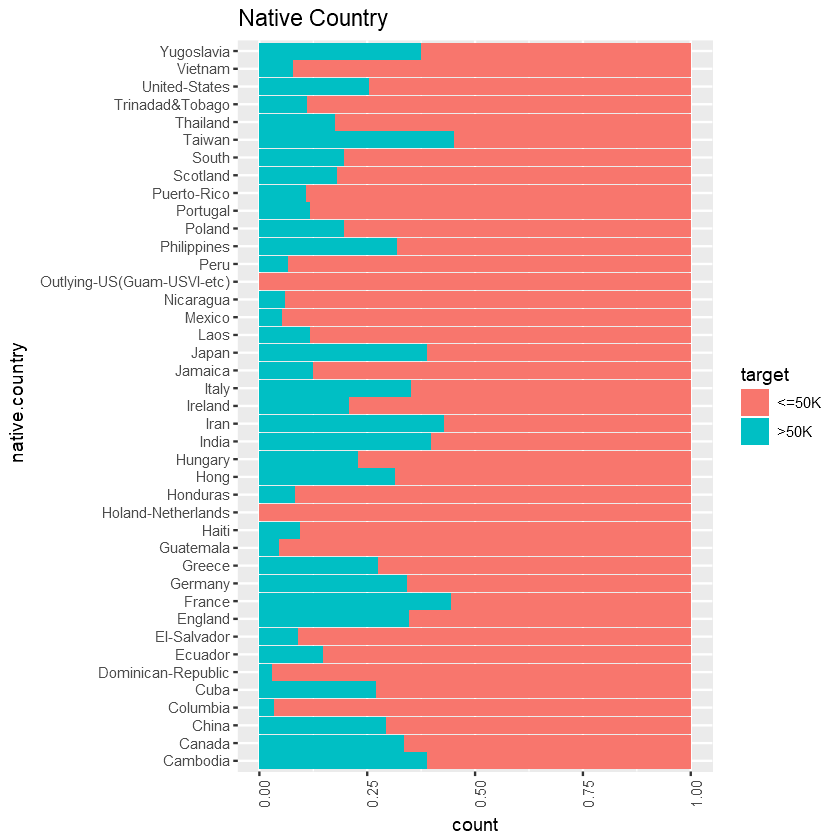

In [25]:
#native.country
ggplot(adult_omitted, aes(x = native.country, fill = target)) + geom_bar(position="fill") + coord_flip() +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Native Country")

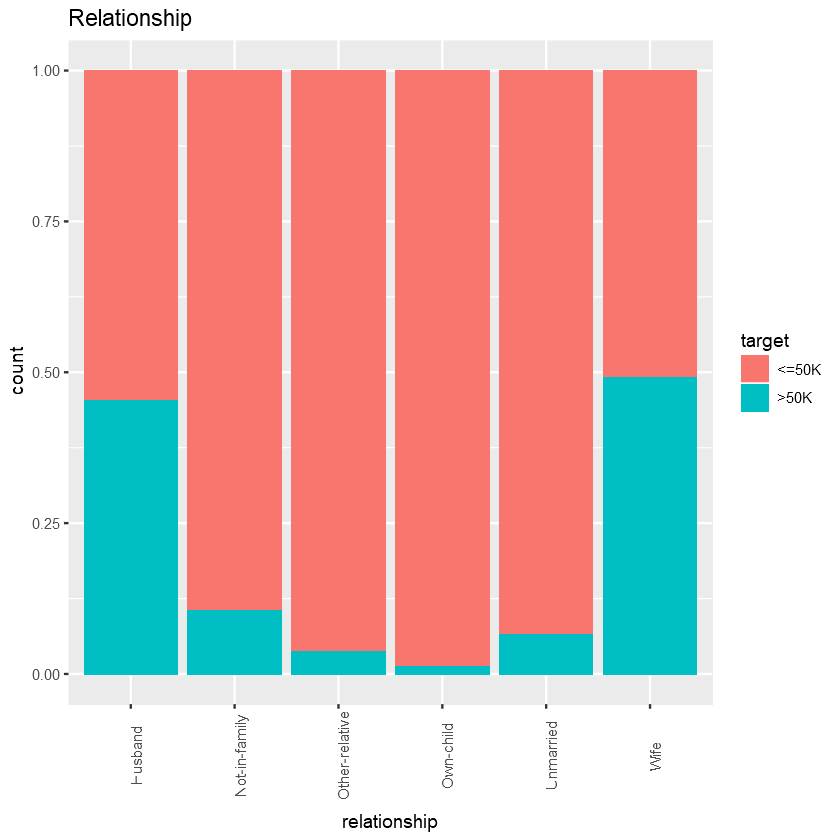

In [35]:
#relationship
ggplot(adult, aes(x = relationship, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Relationship")

## *Correlation between variables*

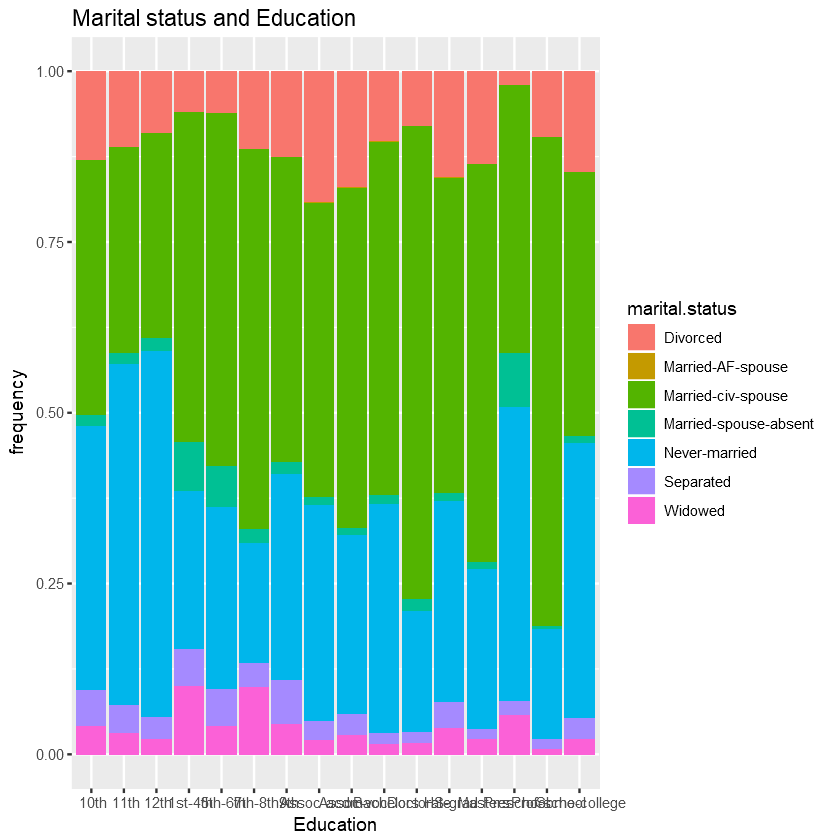

In [12]:
ggplot(adult, aes(education, fill = marital.status )) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Marital status and Education')+
  xlab('Education') +
  ylab('frequency')


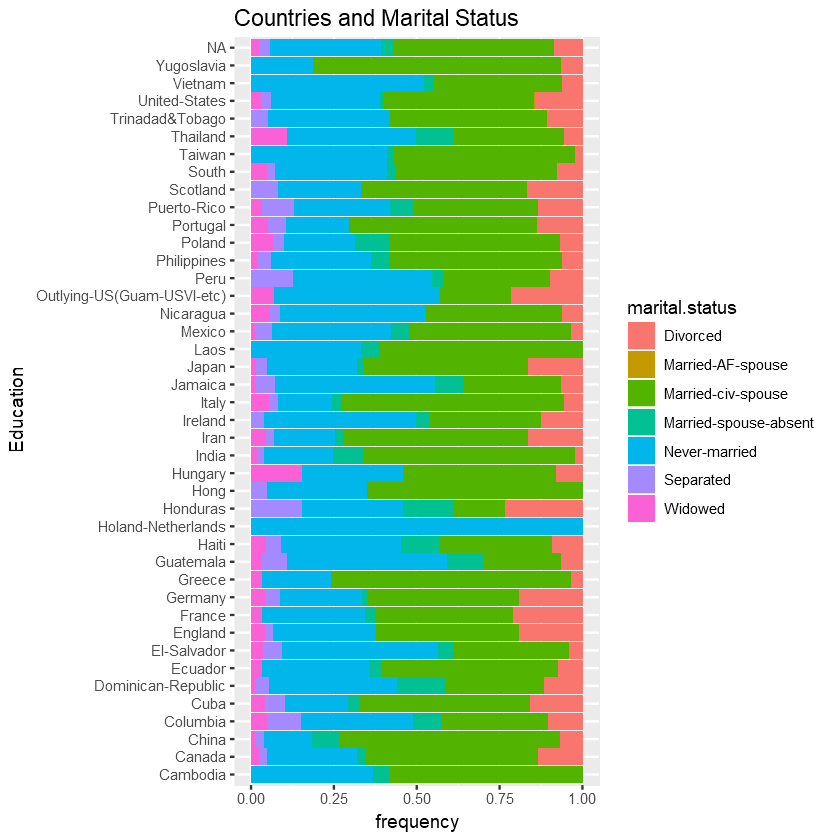

In [36]:
ggplot(adult, aes(native.country, fill = marital.status )) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Countries and Marital Status')+
  xlab('Education') +
  ylab('frequency')


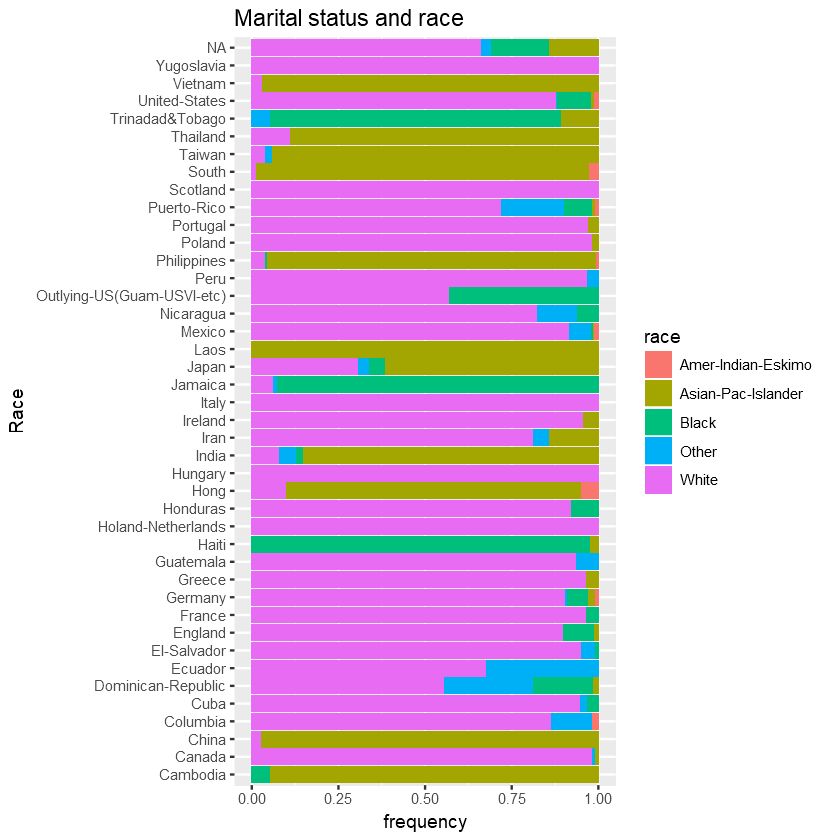

In [35]:
ggplot(adult, aes(native.country, fill = race )) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Marital status and race')+
  xlab('Race') +
  ylab('frequency')


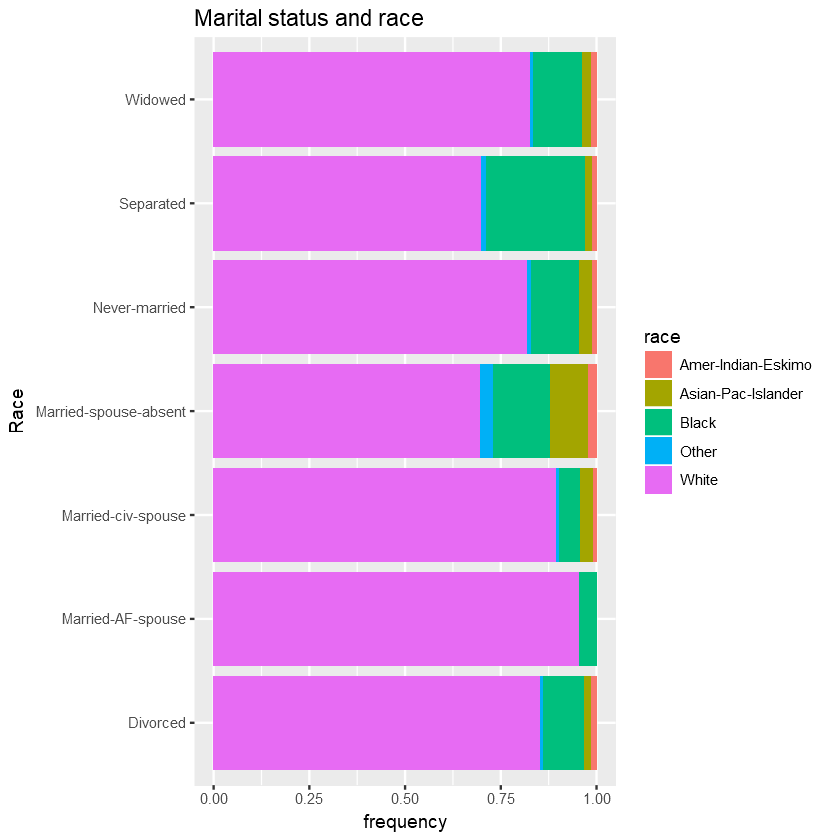

In [53]:
ggplot(adult, aes(marital.status, fill = race) ) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Marital status and race')+
  xlab('Race') +
  ylab('frequency')


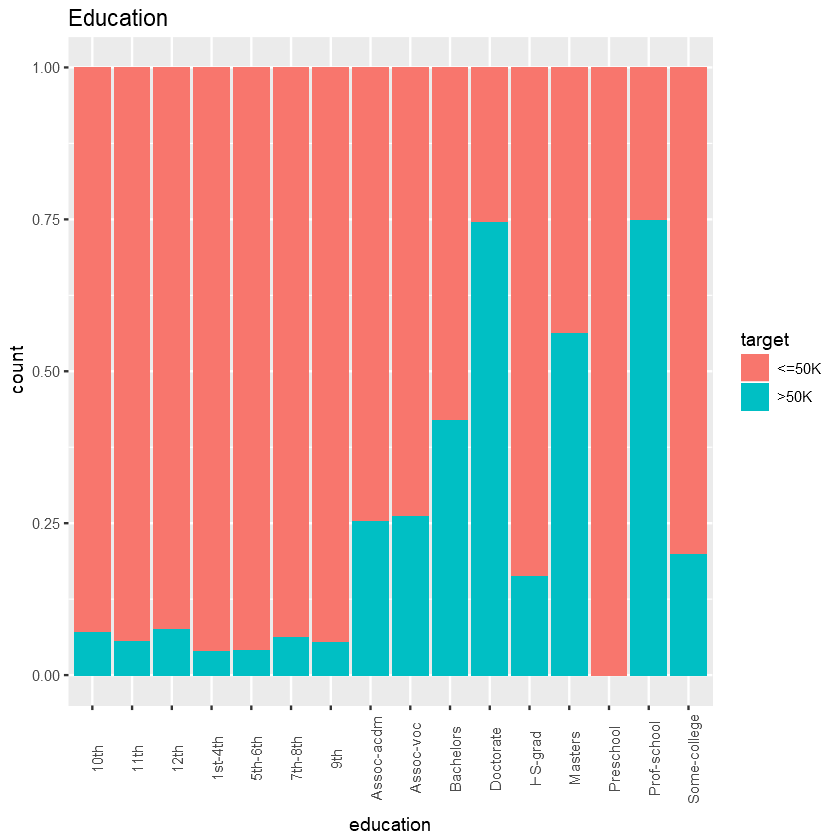

In [36]:
#education vs education.num
#Plotting education and education.num
ggplot(adult, aes(x = education, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Education")

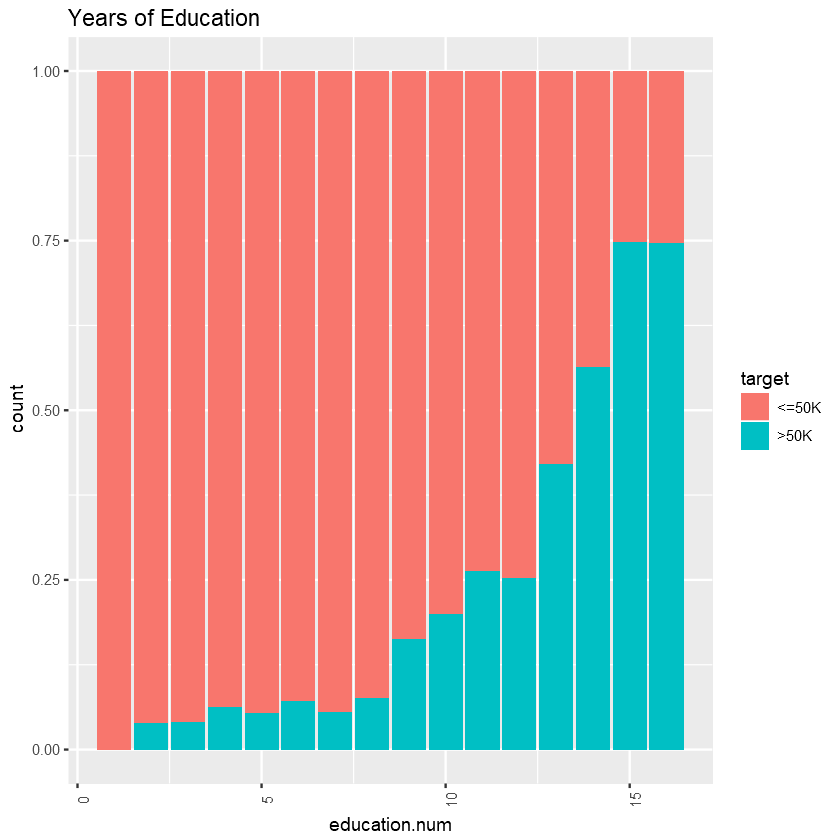

In [37]:
ggplot(adult, aes(x = education.num, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Years of Education")

In [38]:
#relationship vs sex
#ggplot(adult, aes(x = relationship, fill = sex)) + geom_bar(position="fill") + 
#theme(axis.text.x = element_text(angle = 90)) + ggtitle("Relationship and Gender")

In [39]:
adult$relationship <- combineLevels(adult$relationship, levs=c("Husband", "Wife"), "Spouse")

#relationship vs sex
ggplot(adult, aes(x = relationship, fill = sex)) + geom_bar(position="fill") +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Relationship and Gender")

Error: requested levels: " Husband Wife " are not in the legal list of factor levels:" "

ERROR: Error in combineLevels(adult$relationship, levs = c("Husband", "Wife"), : 


**Number male and female workers who have salaries greater than 50K**


Warning message:
"package 'bindrcpp' was built under R version 3.4.3"

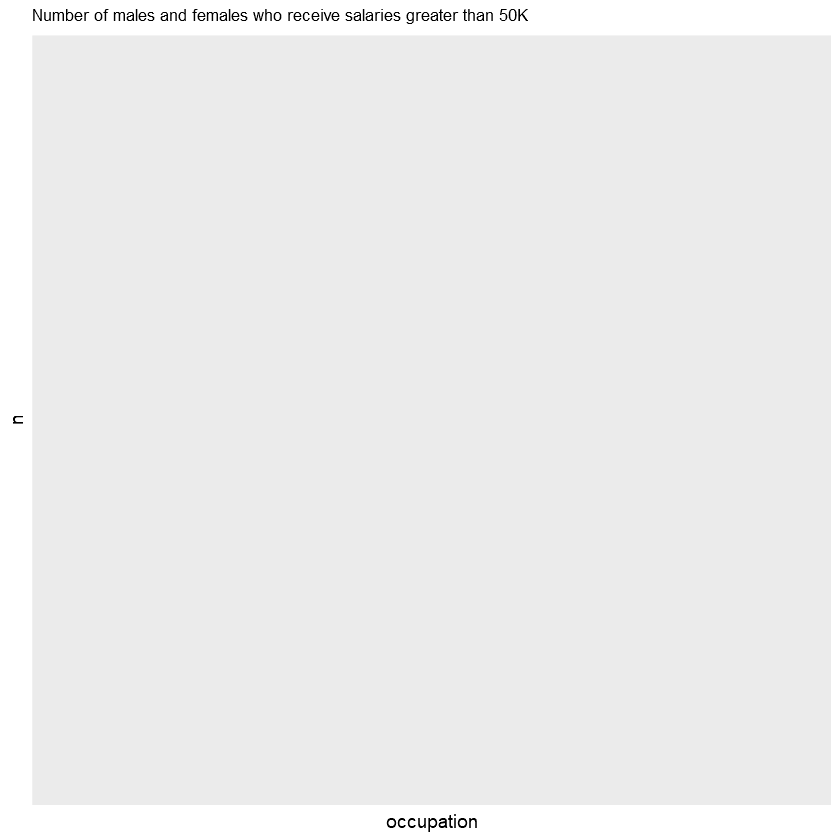

In [40]:
adult %>% select(sex,target,occupation) %>% mutate(income_binary=ifelse(target=='>50K',"Yes","No"))%>% filter(income_binary=='Yes') %>%
  group_by(occupation,sex) %>% summarise(n=n()) %>%
  ggplot(aes(x=occupation,y=n,fill=sex))+
  geom_bar(position='dodge',stat='identity')+
  ggtitle("Number of males and females who receive salaries greater than 50K")+
  theme(plot.title=element_text(size=10),axis.text.x=element_text(angle=90,vjust=1))

**Mean number of working hours per week for each gender**


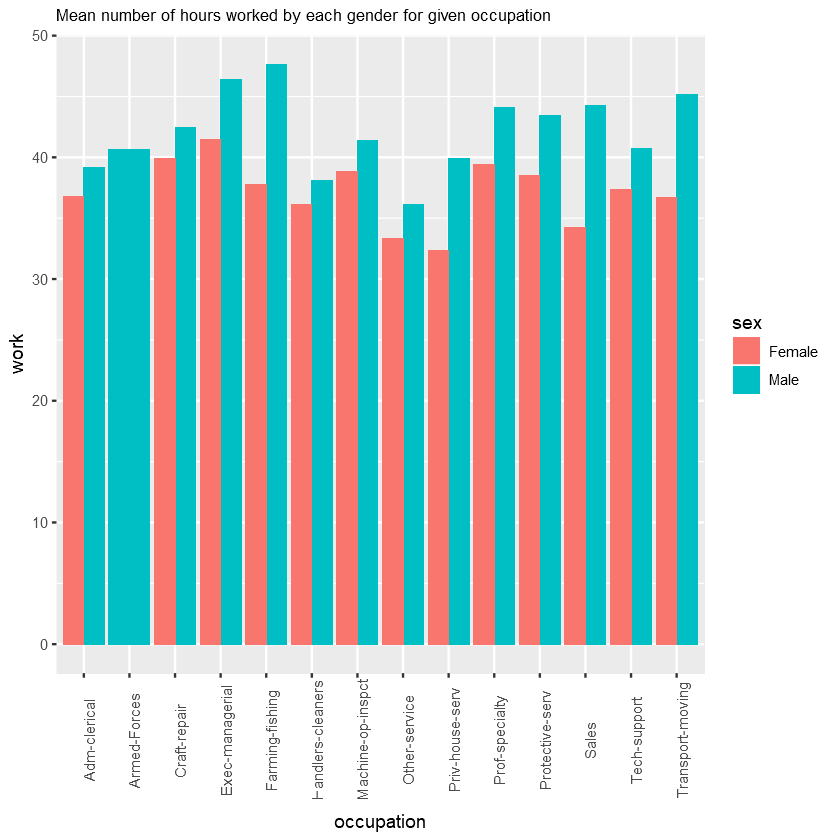

In [41]:
adult %>% select(sex,occupation,hours.per.week) %>% group_by(sex,occupation) %>% 
  summarise(work=mean(hours.per.week,na.rm=T)) %>%
  ggplot(aes(x=occupation, y=work, fill=sex)) +
  geom_bar(position="dodge",stat='identity')+
  ggtitle("Mean number of hours worked by each gender for given occupation")+
  theme(plot.title=element_text(size=10),axis.text.x = element_text(angle=90, vjust=1))

**Number of workers of each gender in each occupation**

In [83]:
adult %>% select(sex,occupation) %>% group_by(occupation,sex) %>% summarise(n=n())%>%
  ggplot(aes(x=occupation,y=n,fill=sex))+
  geom_bar(position='dodge',stat='identity')+
  ggtitle("Number of each gender in each occupation")+
  theme(plot.title=element_text(size=10),axis.text.x=element_text(angle=90,vjust=1))

ERROR: Error in FUN(X[[i]], ...): object 'sex' not found


**Number of working hours per week by workclass**

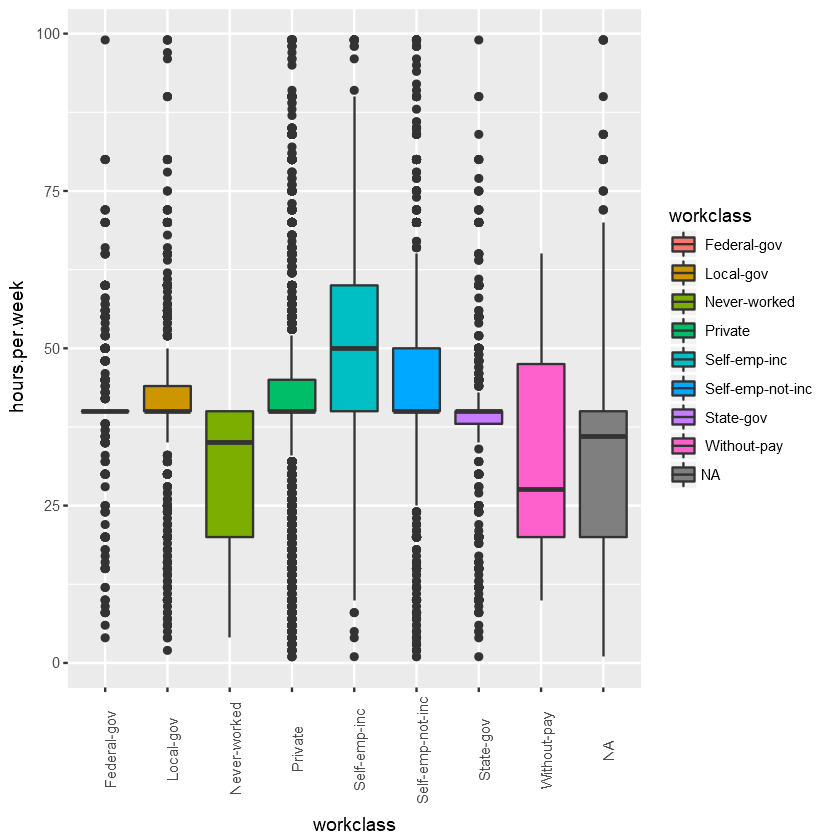

In [4]:
qplot(workclass, hours.per.week, data=adult_om, geom="boxplot", fill=workclass)+
  theme(plot.title=element_text(size=18),axis.text.x=element_text(angle=90,vjust=1))

In [46]:
countrycodes <- countrycode(adult$native.country, 'country.name', 'iso3c') 

Warning message in countrycode(adult$native.country, "country.name", "iso3c"):
"Some values were not matched unambiguously:  Columbia,  England,  Hong,  Scotland,  South,  Yugoslavia
"

In [16]:
#plot(adult$education.num, adult$education, main="Education vs Years of Education")

In [60]:
#https://www.kaggle.com/notaapple/detailed-exploratory-data-analysis-using-r

## *Hypothesis Testing*

## Classification

In [19]:
colnames(df)[14]<-'Country'
df3<-adult
cato<-c('sex')
for(each in cato){
  df3[,each]<-as.integer(df3[,each])
}
#model_df <- adult_omitted

ERROR: Error in `colnames<-`(`*tmp*`, value = c(NA, NA, NA, NA, NA, NA, NA, NA, : attempt to set 'colnames' on an object with less than two dimensions


In [17]:
library(caret)
set.seed(1)
#Partitioning data with respect to dependent variable income
train_ind <- createDataPartition(model_df$target, p= .8, list=FALSE)
training_set<-adult[train_ind,]
testing_set<-adult[-train_ind,]

ERROR: Error in createDataPartition(model_df$target, p = 0.8, list = FALSE): object 'model_df' not found


In [52]:
library(rpart)
library(rpart.plot)
treeFit <- rpart(target~. ,data = training_set,method = 'class')
print(treeFit)

svm.model<- svm(target~., data = train.data,kernel = "radial", cost = 1, gamma = 0.1)

ERROR: Error in svm.default(x, y, scale = scale, ..., na.action = na.action): NA/NaN/Inf in foreign function call (arg 4)


In [24]:
#rpart.plot(treeFit, box.col=c("red", "blue"))

In [24]:
Prediction_tree <- predict(treeFit, newdata = testing_set[-15],type = 'class')
TreeAcu<-confusionMatrix(Prediction_tree,testing_set$target)$overall[1]
TreeAcu

Accuracy 
0.8410439

### XGBoost

In [8]:
# get a boolean vector of training labels
adultLabels <- adult %>%
    select(target) %>% # get the column with the # of humans affected
    is.na() %>% # is it NA?
    magrittr::not() # switch TRUE and FALSE (using function from the magrittr package)

# check out the first few lines
head(adultLabels) # of our target variable
head(adult$target) # of the original column

target
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE


[1] " <=50K" " <=50K" " <=50K" " <=50K" " <=50K" " <=50K"

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
sex <- model.matrix(~sex-1,head(adult))
workclass <- model.matrix(~workclass-1,head(adult_omitted)) 
workclass

,workclass Private,workclass Self-emp-not-inc,workclass State-gov
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0


In [ ]:
# select just the numeric columns
diseaseInfo_numeric <- diseaseInfo_humansRemoved %>%
    select(-Id) %>% # the case id shouldn't contain useful information
    select(-c(longitude, latitude)) %>% # location data is also in country data
    select_if(is.numeric) # select remaining numeric columns

# make sure that our dataframe is all numeric
str(diseaseInfo_numeric)

### SVM

In [20]:
library(e1071)
ratio = sample(1:nrow(adult_omitted.cmplt), size = 0.25*nrow(adult_omitted.cmplt))
test.data = adult_omitted.cmplt[ratio,] #Test dataset 25% of total
train.data = adult_omitted.cmplt[-ratio,] #Train dataset 75% of total
#svm.model<- svm(income~., data = train.data,kernel = "radial", cost = 1, gamma = 0.1)

ERROR: Error in nrow(adult_omitted.cmplt): object 'adult_omitted.cmplt' not found
